# Fine-tuning the AlexNet Model

Build an AlexNet Model

Then explore the PyTorch pretrained CNN model repo

* Successor to LeNet
* Much larger dataset and parameters
* Moved CNNs forward

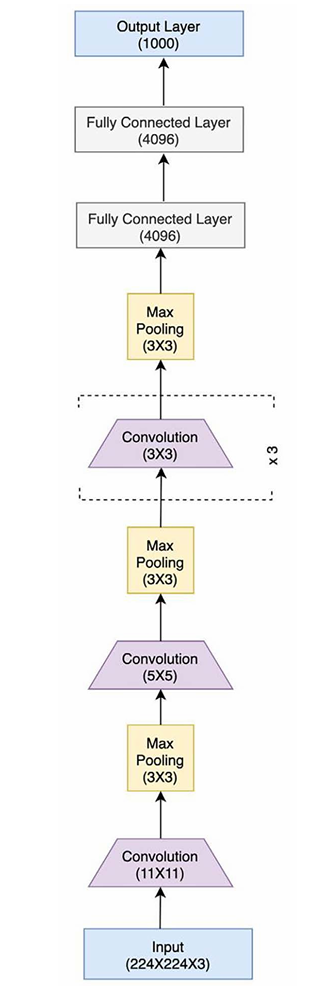

AlexNet Architecture

```
class AlexNet(nn.Module):
    def __init__(self, number_of_classes):
        super(AlexNet, self).__init__()
        self.feats = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, 
                      kernel_size=11, stride=4, padding=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, 
                      kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, 
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.clf = nn.Linear(in_features=256, out_features=number_of_classes)
    def forward(self, inp):
        op = self.feats(inp)
        op = op.view(op.size(0), -1)
        op = self.clf(op)
        return op
```

Pytorch contains models sub-packages for the following (Not all encompassing):

* AlexNet
* VGG
* ResNet
* SqueezeNet
* DenseNet
* Inception v3
* GoogLeNet
* ShuffleNet v2
* MobileNet v2
* ResNeXt
* Wide ResNet
* MnasNet
* EfficientNet

## Fine Tuning AlexNet

Imports

In [25]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
torch.use_deterministic_algorithms(True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Download and transform the dataset

Images of bees and ants

In [ ]:
ddir = 'hymenoptera_data'

# create the ddir if it does not exist
if not os.path.exists(ddir):
    os.makedirs(ddir)

# download the dataset windows
!curl -L "https://download.pytorch.org/tutorial/hymenoptera_data.zip" -o hymenoptera_data.zip

# unzip the dataset, this is a windows 11 desktop
!tar -xvf hymenoptera_data.zip

# remove the hymenoptera_data.zip file
!del hymenoptera_data.zip

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221, 0.230]),
    ]),
}

img_data = {k: datasets.ImageFolder(os.path.join(ddir, k), data_transforms[k]) for k in ['train', 'val']}

dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=4, shuffle=True) for k in ['train', 'val']}

dset_sizes = {x: len(img_data[x]) for x in ['train', 'val']}

classes = img_data['train'].classes

Visual some sample training images

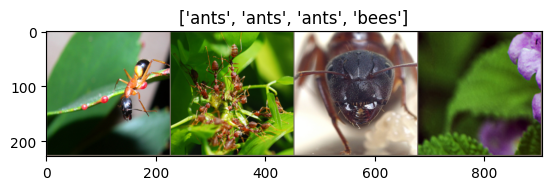

In [58]:
def imageshow(img, text=None):
    img = img.numpy().transpose((1, 2, 0))
    avg = np.array([0.490, 0.449, 0.411])
    stddev = np.array([0.231, 0.221, 0.230])
    img = stddev * img + avg
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if text is not None:
        plt.title(text)
# Generate one train dataset batch
imgs, cls = next(iter(dloaders['train']))
# Generate a grid from the batch
grid = torchvision.utils.make_grid(imgs)
imageshow(grid, text=[classes[c] for c in cls])

Define a fine tuning routine, which is training on a pretrained model

In [ ]:
def finetune_model(pretrained_model, loss_func, optim, epochs=10):
    ...


.... ALL OF THE EXAMPLES IN THE BOOK ARE INCOMPLETE....